In [1]:
# Data cleaning & preprocessing
import pandas as pd
import numpy as np

data = pd.read_csv('../data/OnlineRetail.csv', encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# Check for missing values
data.info()
print("\nMissing values in each column:")
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Missing values in each column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
# Drop missing customer IDs value
processed_data = data.dropna(subset=['CustomerID'])
processed_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [4]:
# Remove rows with negative or zero quantity
processed_data = processed_data[processed_data['Quantity'] > 0]
# Convert InvoiceDate to datetime
processed_data['InvoiceDate'] = pd.to_datetime(processed_data['InvoiceDate'], errors='coerce')

In [5]:
# Count how many invoices are there for each customer
customer_invoices = processed_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_invoices.columns = ['CustomerID', 'PurchaseFrequency']

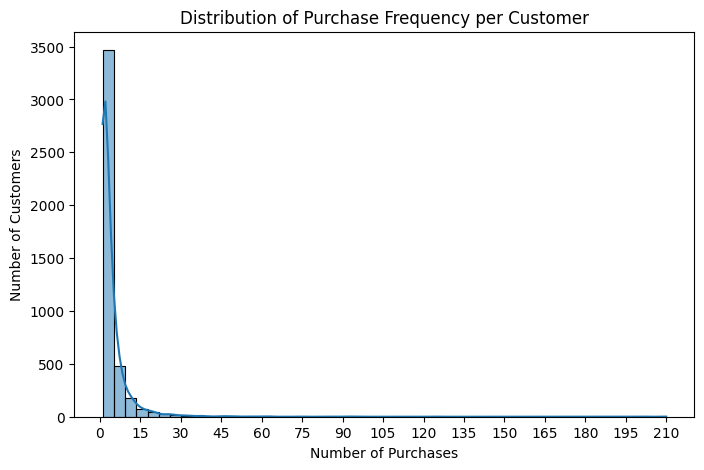

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Visualize the distribution of purchase frequency
plt.figure(figsize=(8, 5))
sns.histplot(customer_invoices['PurchaseFrequency'], bins=50, kde=True)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))

plt.show()


In [7]:
# Products purchased by month
monthly_sales = processed_data.groupby([processed_data['InvoiceDate'].dt.to_period('M'), 'Description'])['Quantity'].sum().reset_index()
monthly_sales.columns = ['Month', 'Product', 'TotalQuantity']


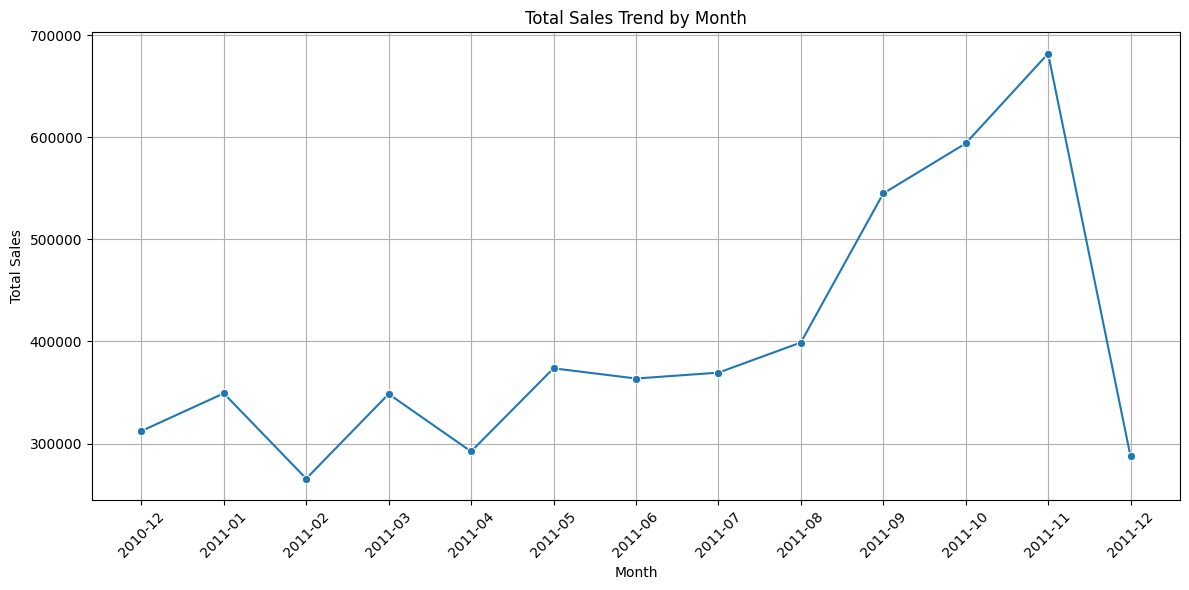

In [8]:
# Total sales by month
monthly_sales_summary = monthly_sales.groupby('Month')['TotalQuantity'].sum().reset_index()
monthly_sales_summary.columns = ['Month', 'TotalSales']

# Convert to csv
monthly_sales_summary.to_csv('../data/monthly_sales_summary.csv', index=False)

monthly_sales_summary['Month'] = monthly_sales_summary['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_summary, x='Month', y='TotalSales', marker='o')
plt.title('Total Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.savefig('../imgs/monthly_sales_trend.png')

plt.show()

In [9]:
# Top 10 products sold by month each year
top_products_by_month = monthly_sales.groupby('Month').apply(
    lambda x: x.sort_values(by='TotalQuantity', ascending=False).head(10)
).reset_index(drop=True)

top_products_by_month

# Export to CSV
top_products_by_month.to_csv('../data/top_10_products_by_month.csv', index=False)

/tmp/ipykernel_18673/3126230076.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_month = monthly_sales.groupby('Month').apply(


In [10]:
import plotly.express as px

fig = px.bar(top_products_by_month, 
             x='TotalQuantity', y='Product', 
             color='Month', 
             orientation='h', 
             title="Top 10 Products Sold by Month")

fig.write_html("../imgs/top_products_by_month.html")
fig.write_image("../imgs/top_products_by_month.png")

fig.show()

/tmp/ipykernel_18673/3308684411.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




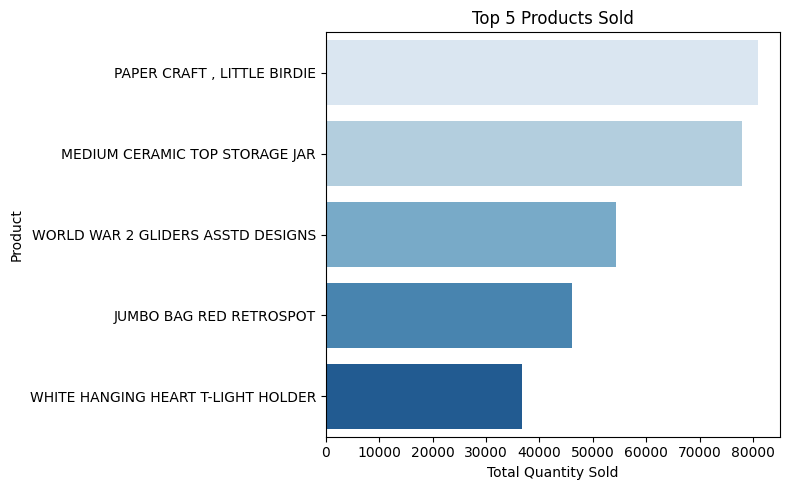

In [11]:
# Top 5 products
top_5_products = processed_data.groupby('Description')['Quantity'].sum().nlargest(5).reset_index()
top_5_products.columns = ['Product', 'TotalQuantity']

plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_products, x='TotalQuantity', y='Product', palette='Blues')
plt.title('Top 5 Products Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()

plt.savefig('../imgs/top_5_products.png')

plt.show()